# 유한차분법(Finite Difference Method)으로 ELS 평가

### 토마스 알고리즘

In [1]:
import numpy as np

def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

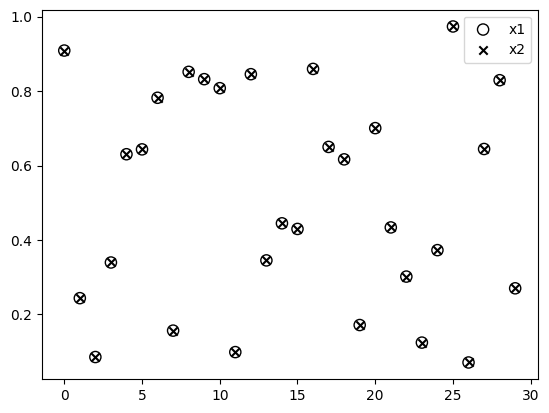

In [ ]:
# 토마스 알고리즘 검증

import numpy as np
import matplotlib.pyplot as plt

n=30; x=np.linspace(0, n-1, n)
a=np.random.rand(n)
d=100+np.random.rand(n)
c=np.random.rand(n)
A=np.zeros((n, n))

for i in range(1, n):
    A[i, i-1]=a[i]
for i in range(0, n):
    A[i, i]=d[i]
for i in range(0, n-1):
    A[i, i+1]=c[i]
x1=np.random.rand(n)
b=np.dot(A,x1)
x2=thomas(a,d,c,b)
plt.scatter(x, x1, s=65, facecolors='none', edgecolors='k', label='x1')
plt.scatter(x, x2, color='k', marker='x', label='x2')
plt.legend()
plt.show()

### FDM을 이용한 옵션 가격 결정

#### 1) 기초자산이 1개인 콜옵션 가격 결정

#### ① 균일 격자

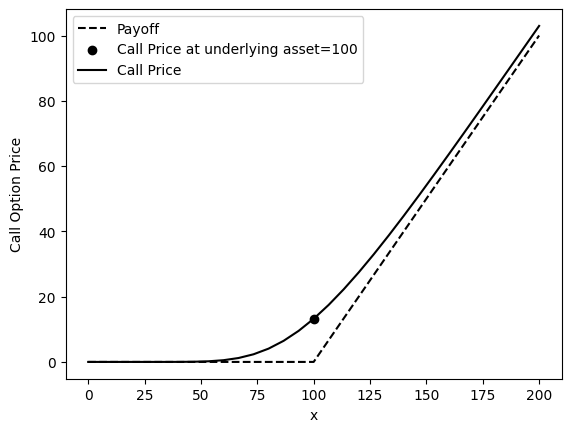

Price=13.207513


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
K=100; R=200; volatility=0.3
r=0.03; T=1
Nx=31; Nt=360*T; dt=T/Nt
x=np.linspace(0, R, Nx)
h=x[1]-x[0]
u=np.zeros((Nx, Nt+1))

for i in range (0,Nx):
    u[i,0]=np.maximum(x[i]-K,0)
plt.plot(x,u[:,0],'k--',label='Payoff')
[a,d,c,b]=map(np.zeros, [Nx, Nx, Nx, Nx])
for i in range (0,Nx):
    a[i]=r*x[i]/(2*h)-(volatility*x[i])**2/(2*h**2)
    d[i]=(1/dt)+(volatility*x[i])**2/(h**2)+r
    c[i]=-r*x[i]/(2*h)-(volatility*x[i])**2/(2*h**2)
a[Nx-1]=a[Nx-1]-c[Nx-1]
d[Nx-1]=d[Nx-1]+2*c[Nx-1]

for n in range (0,Nt):
    b=u[:,n]/dt
    u[:,n+1]=thomas(a,d,c,b)
ii=np.where(x==100)

plt.scatter(x[ii], u[ii,Nt], color='k', label='Call Price at underlying asset=100')
plt.plot(x,u[:,Nt], 'k-', label='Call Price')
plt.xlabel('x', fontsize=10)
plt.ylabel('Call Option Price', fontsize=10)
plt.legend()
plt.show()
print('Price=%f'%(u[ii,Nt]))

#### ② 비균일 격자

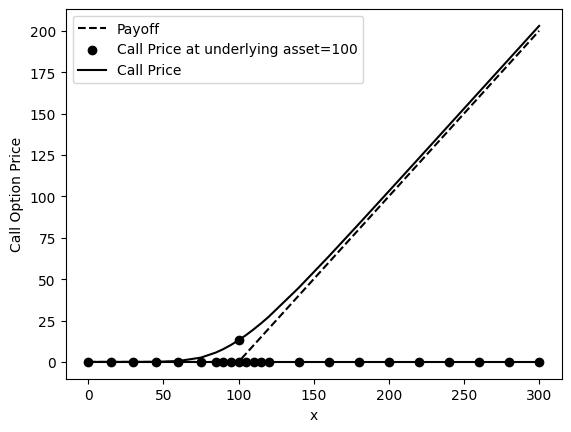

Price=13.069568


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

K=100; volatility=0.3
r=0.03; T=1
Nt=360*T; dt=T/Nt

A=np.arange(0,80,15)
B=np.arange(85,125,5)
C=np.arange(140,320,20)
x=np.r_[A,B,C]
h=np.diff(x); h=np.r_[h[0], h, h[-1]]
Nx=len(x); u=np.zeros((Nx, Nt+1))
u[:,0]=np.maximum(x-K,0)
plt.plot(x,u[:,0],'k--',label='Payoff')

[a,d,c,b]=map(np.zeros, [Nx-1, Nx-1, Nx-1, Nx-1])
a[:]=(-volatility**2*x[1:Nx]**2+r*x[1:Nx]*h[2:Nx+1])/(h[1:Nx]*(h[1:Nx]+h[2:Nx+1]))
d[:]=(volatility**2*x[1:Nx]**2-r*x[1:Nx]*(h[2:Nx+1]-h[1:Nx]))/(h[1:Nx]*h[2:Nx+1])+r+1/dt
c[:]=(-volatility**2*x[1:Nx]**2-r*x[1:Nx]*h[1:Nx])/(h[2:Nx+1]*(h[1:Nx]+h[2:Nx+1]))
a[Nx-2]=a[Nx-2]-c[Nx-2]
d[Nx-2]=d[Nx-2]+2*c[Nx-2]

for n in range (0,Nt):
    b=u[1:Nx, n]/dt
    u[1:Nx,n+1]=thomas(a,d,c,b)
ii=np.where(x==100)

plt.scatter(x[ii], u[ii,Nt], color='k', label='Call Price at underlying asset=100')
plt.plot(x,u[:,Nt], 'k-', label='Call Price')
plt.plot(x,0*u[:,Nt], 'ko-')
plt.xlabel('x', fontsize=10)
plt.ylabel('Call Option Price', fontsize=10)
plt.legend()
plt.show()
print('Price=%f'%(u[ii,Nt]))

#### 2) 기초자산이 2개인 콜옵션 가격 결정

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

R=300; Kx=100; Ky=100; Nx=61; Ny=61;
x=np.linspace(0, R, Nx); y=np.linspace(0, R, Ny)
x_volatility=0.3; y_volatility=0.3; rho=0.3; r=0.03; h=x[1]-x[0];
dt=1/365; T=1; Nt=T/dt
u0=np.zeros((Nx, Ny))
for i in range(Nx):
    for j in range(Ny):
        u0[i,j]=np.maximum(np.maximum(x[i]-Kx,y[j]-Ky),0)

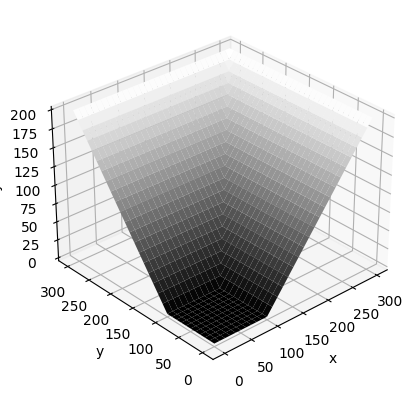

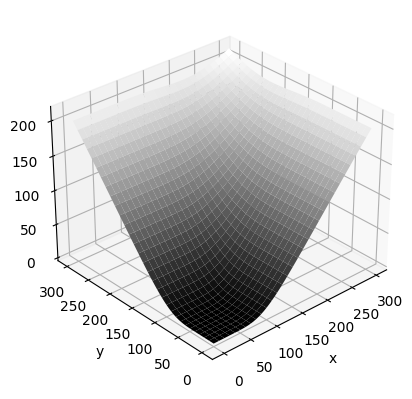

Price=21.532784


In [ ]:
X, Y = np.meshgrid(x,y)
fig1=plt.figure()
ax=fig1.add_subplot(projection='3d')
ax.plot_surface(X,Y,u0[:,:],cmap=plt.cm.gray)
ax.view_init(elev=30., azim=-132)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Payoff', rotation=90, fontsize=10)
plt.show()

[ax,dx,cx,ay,dy,cy]=map(np.zeros, [Nx-2, Nx-2, Nx-2, Nx-2, Nx-2, Nx-2])
ax[:]=-(x_volatility*x[1:Nx-1])**2/(2*h**2)+r*x[1:Nx-1]/(2*h)
dx[:]=1/dt+(x_volatility*x[1:Nx-1]/h)**2+r/2
cx[:]=-(x_volatility*x[1:Nx-1])**2/(2*h**2)-r*x[1:Nx-1]/(2*h)
ay[:]=-(y_volatility*y[1:Ny-1])**2/(2*h**2)+r*y[1:Ny-1]/(2*h)
dy[:]=1/dt+(y_volatility*y[1:Ny-1]/h)**2+r/2
cy[:]=-(y_volatility*y[1:Ny-1])**2/(2*h**2)-r*y[1:Ny-1]/(2*h)
u=u0; u2=u0;
[fx,fy]=map(np.zeros, [Nx-2, Ny-2])

for n in range (int(Nt)):
    u[0,0:Ny-1]=2*u[1,0:Ny-1]-u[2,0:Ny-1]
    u[0:Nx-1,0]=2*u[0:Nx-1,1]-u[0:Nx-1,2]
    u[Nx-1,2:Ny-2]=2*u[Nx-2,2:Ny-2]-u[Nx-3,2:Ny-2]
    u[2:Nx-2,Ny-1]=2*u[2:Nx-2,Ny-2]-u[2:Nx-2,Ny-3]
    u[1,Ny-1]=2*u[2,Ny-2]-u[3,Ny-3]
    u[0,Ny-2]=2*u[1,Ny-3]-u[2,Ny-4]
    u[0,Ny-1]=2*u[1,Ny-2]-u[2,Ny-3]
    u[Nx-1,1]=2*u[Nx-2,2]-u[Nx-3,3]
    u[Nx-2,0]=2*u[Nx-3,1]-u[Nx-4,2]
    u[Nx-1,0]=2*u[Nx-2,1]-u[Nx-3,2]
    u[Nx-1,Ny-1]=2*u[Nx-2,Ny-2]-u[Nx-3,Ny-3]
    u[Nx-2,Ny-1]=2*u[Nx-3,Ny-2]-u[Nx-4,Ny-3]
    u[Nx-1,Ny-2]=2*u[Nx-2,Ny-3]-u[Nx-3,Ny-4]
    # x축으로 풀기
    for j in range(1,Ny-1):
        fx[:]=u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility\
          *x[1:Nx-1]*y[j]*(u[2:Nx,j+1]+u[0:Nx-2,j-1]-u[0:Nx-2,j+1]\
          -u[2:Nx,j-1])/(4*h**2)
        fx[0]=fx[0]-ax[0]*u[0,j]
        fx[Nx-3]=fx[Nx-3]-cx[Nx-3]*u[-1,j]
        u2[1:Nx-1, j]=thomas(ax,dx,cx,fx)
    # hybrid 경계조건
    u2[0,0:Ny-1]=2*u2[1,0:Ny-1]-u2[2,0:Ny-1]
    u2[0:Nx-1,0]=2*u2[0:Nx-1,1]-u2[0:Nx-1,2]
    u2[Nx-1,2:Ny-2]=2*u2[Nx-2,2:Ny-2]-u2[Nx-3,2:Ny-2]
    u2[2:Nx-2,Ny-1]=2*u2[2:Nx-2,Ny-2]-u2[2:Nx-2,Ny-3]
    u2[1,Ny-1]=2*u2[2,Ny-2]-u2[3,Ny-3]
    u2[0,Ny-2]=2*u2[1,Ny-3]-u2[2,Ny-4]
    u2[0,Ny-1]=2*u2[1,Ny-2]-u2[2,Ny-3]
    u2[Nx-1,1]=2*u2[Nx-2,2]-u2[Nx-3,3]
    u2[Nx-2,0]=2*u2[Nx-3,1]-u2[Nx-4,2]
    u2[Nx-1,0]=2*u2[Nx-2,1]-u2[Nx-3,2]
    u2[Nx-1,Ny-1]=2*u2[Nx-2,Ny-2]-u2[Nx-3,Ny-3]
    u2[Nx-2,Ny-1]=2*u2[Nx-3,Ny-2]-u2[Nx-4,Ny-3]
    u2[Nx-1,Ny-2]=2*u2[Nx-2,Ny-3]-u2[Nx-3,Ny-4]
    # y축으로 풀기
    for i in range(1,Ny-1):
        fy[:]=u2[i,1:Nx-1]/dt+0.5*rho*x_volatility*y_volatility\
          *x[i]*y[1:Ny-1]*(u2[i+1,2:Ny]+u2[i-1,0:Ny-2]-u[i-1, 2:Ny]\
          -u[i+1,0:Ny-2])/(4*h**2)
        fy[0]=fy[0]-ay[0]*u2[i,0]
        fy[Ny-3]=fy[Ny-3]-cy[Ny-3]*u2[i,-1]
        u[i,1:Ny-1]=thomas(ay,dy,cy,fy)

fig2=plt.figure()
bx=fig2.add_subplot(projection='3d')
bx.plot_surface(X,Y,u[:,:],cmap=plt.cm.gray)
bx.view_init(elev=30., azim=-132)
bx.set_xlabel('x', fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('Call option price', rotation=90, fontsize=10)
plt.show()
ii=np.argwhere(x==100)
jj=np.argwhere(y==100)
print('Price=%f'%(u[ii,jj]))

#### 3) 비균일 격자로 기초자산이 3개인 콜옵션 가격 결정

In [ ]:
import numpy as np

x_volatility=0.3; y_volatility=0.3; z_volatility=0.3 # 각각의 변동성
rho_xy=0.4; rho_yz=0.4; rho_xz=0.4; # 상관계수
r=0.015;  # 무위험 이자율
T=1; # 만기
K1=100; K2=K1; K3=K1
Nt=360; dt=1/Nt  # 최초 기준가격
x1=np.array([0])
x2=np.arange(64,132,2)
x3=np.array([170,180,200,201,213,223,242,255,267,278,289,300])
x=np.r_[x1,x2,x3]
y1=np.array([0])
y2=np.arange(60,126,2)
y3=np.array([160,175,200,202,214,215,252,267,278,279,282,300])
y=np.r_[y1,y2,y3]
z1=np.array([0])
z2=np.arange(70,136,2)
z3=np.array([165,173,200,205,206,222,234,268,269,270,282,300])
z=np.r_[z1,z2,z3]
# x, y, z벡터의 크기
Nx=len(x); Ny=len(y); Nz=len(z);
hx=np.diff(x); hy=np.diff(y); hz=np.diff(z);
u0=np.zeros((Nx,Ny,Nz))
u=np.zeros((Nx,Ny,Nz))
u1=np.zeros((Nx,Ny,Nz))
u2=np.zeros((Nx,Ny,Nz))
# 유한차분법으로 콜옵션 가격을 구하기 위한 초기값
for i in range(Nx):
    for j in range(Ny):
        for k in range(Nz):
            u0[i,j,k]=np.maximum(np.maximum(np.maximum(x[i]-K1,\
              y[j]-K2),z[k]-K3),0)
# 유한차분법을 사용하기 위한 계수
[ax,dx,cx,ay,dy,cy,az,dz,cz]=map(np.zeros,[Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2,Nz-2,Nz-2,Nz-2])
ax[:]=(-(x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[1:Nx-1])/(hx[0:Nx-2]*(hx[0:Nx-2]+hx[1:Nx-1]))
dx[:]=1.0/dt+(x_volatility*x[1:Nx-1])**2/(hx[0:Nx-2]*hx[1:Nx-1])-r*x[1:Nx-1]*(hx[1:Nx-1]-hx[0:Nx-2])/(hx[0:Nx-2]*hx[1:Nx-1])+r/3
cx[:]=-((x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[0:Nx-2])/(hx[1:Nx-1]*(hx[0:Nx-2]+hx[1:Nx-1]))
# 선형 경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]
ay[:]=(-(y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[1:Ny-1])/(hy[0:Ny-2]*(hy[0:Ny-2]+hy[1:Ny-1]))
dy[:]=1.0/dt+(y_volatility*y[1:Ny-1])**2/(hy[0:Ny-2]*hy[1:Ny-1])-r*y[1:Ny-1]*(hy[1:Ny-1]-hy[0:Ny-2])/(hy[0:Ny-2]*hy[1:Ny-1])+r/3
cy[:]=-((y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[0:Ny-2])/(hy[1:Ny-1]*(hy[0:Ny-2]+hy[1:Ny-1]))
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]
az[:]=(-(z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[1:Nz-1])/(hz[0:Nz-2]*(hz[0:Nz-2]+hz[1:Nz-1]))
dz[:]=1.0/dt+(z_volatility*z[1:Nz-1])**2/(hz[0:Nz-2]*hz[1:Nz-1])-r*z[1:Nz-1]*(hz[1:Nz-1]-hz[0:Nz-2])/(hz[0:Nz-2]*hz[1:Nz-1])+r/3
cz[:]=-((z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[0:Nz-2])/(hz[1:Nz-1]*(hz[0:Nz-2]+hz[1:Nz-1]))
az[Nz-3]=az[Nz-3]-cz[Nz-3]
dz[Nz-3]=dz[Nz-3]+2*cz[Nz-3]
[fx,fy,fz]=map(np.zeros, [Nx-2,Ny-2,Nz-2])
u=u0

for n in range(Nt):
    # OSM과 토마스 알고리즘을 이용하여 u값 계산
    # x축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=(1/3)*(rho_xy*x_volatility\
              *y_volatility*x[1:Nx-1]*y[j]\
              *(u[2:Nx,j+1,k]-u[2:Nx,j-1,k]\
              -u[0:Nx-2,j+1,k]+u[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
              *hy[j]+hx[1:Nx-1]*hy[j-1]\
              +hx[0:Nx-2]*hy[j-1])+rho_xz\
              *x_volatility*z_volatility\
              *x[1:Nx-1]*z[k]*(u[2:Nx,j,k+1]\
              -u[2:Nx,j,k-1]-u[0:Nx-2,j,k+1]\
              +u[0:Nx-2,j,k-1])/(hx[0:Nx-2]\
              *hz[k]+hx[1:Nx-1]*hz[k]+hx[1:Nx-1]\
              *hz[k-1]+hx[0:Nx-2]*hz[k-1])+rho_yz
              *y_volatility*z_volatility*y[j]*z[k]*\
              (u[1:Nx-1,j+1,k+1]-u[1:Nx-1,j+1,k-1]\
              -u[1:Nx-1,j-1,k+1]+u[1:Nx-1,j-1,k-1])\
              /(hy[j-1]*hz[k]+hy[j]*hz[k]+hy[j]\
              *hz[k-1]+hy[j-1]*hz[k-1]))+u[1:Nx-1,j,k]/dt
            u1[1:Nx-1,j,k]=thomas(ax,dx,cx,fx)
    # y축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=(1/3)*(rho_xy*x_volatility\
              *y_volatility*x[i]*y[1:Ny-1]\
              *(u1[i+1,2:Ny,k]-u1[i+1,0:Ny-2,k]\
              -u1[i-1,2:Ny,k]+u1[i-1,0:Ny-2,k])\
              /(hx[i-1]*hy[1:Ny-1]+hx[i]\
              *hy[1:Ny-1]+hx[i]*hy[0:Ny-2]\
              +hx[i-1]*hy[0:Ny-2])+rho_xz\
              *x_volatility*z_volatility\
              *x[i]*z[k]*(u1[i+1,1:Ny-1,k+1]\
              -u1[i+1,1:Ny-1,k-1]-u1[i-1,1:Ny-1,k+1]\
              +u1[i-1,1:Ny-1,k-1])/(hx[i-1]*hz[k]\
              +hx[i]*hz[k]+hx[i]*hz[k-1]\
              +hx[i-1]*hz[k-1])+rho_yz*y_volatility\
              *z_volatility*y[1:Ny-1]*z[k]\
              *(u1[i,2:Ny,k+1]-u1[i,2:Ny,k-1]\
              -u1[i,0:Ny-2,k+1]+u1[i,0:Ny-2,k-1])\
              /(hy[0:Ny-2]*hz[k]+hy[1:Ny-1]*hz[k]\
              +hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]*hz[k-1]))\
              +u1[i,1:Ny-1,k]/dt
            u2[i,1:Ny-1,k]=thomas(ay,dy,cy,fy)
    # z 축으로 풀기
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            fz[0:Nz-1]=(1/3)*(rho_xy*x_volatility\
              *y_volatility*x[i]*y[j]\
              *(u2[i+1,j+1,1:Nz-1]\
              -u2[i+1,j-1,1:Nz-1]\
              -u2[i-1,j+1,1:Nz-1]\
              +u[i-1,j-1,1:Nz-1])/(hx[i-1]*hy[j]\
              +hx[i]*hy[j]+hx[i]*hy[j-1]+hx[i-1]\
              *hy[j-1])+rho_xz*x_volatility\
              *z_volatility*x[i]*z[1:Nz-1]\
              *(u2[i+1,j,2:Nz]-u2[i+1,j,0:Nz-2]\
              -u2[i-1,j,2:Nz]+u2[i-1,j,0:Nz-2])\
              /(hx[i-1]*hz[1:Nz-1]\
              +hx[i]*hz[1:Nz-1]+hx[i]*hz[0:Nz-2]\
              +hx[i-1]*hz[0:Nz-2])+rho_yz*y_volatility\
              *z_volatility*y[j]*z[1:Nz-1]\
              *(u2[i,j+1,2:Nz]-u2[i,j+1,0:Nz-2]\
              -u2[i,j-1,2:Nz]+u2[i,j-1,0:Nz-2])\
              /(hy[j-1]*hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
              +hy[j]*hz[0:Nz-2]+hy[j-1]*hz[0:Nz-2]))\
              +u2[i,j,1:Nz-1]/dt
            u[i,j,1:Nz-1]=thomas(az,dz,cz,fz)

ii=np.argwhere(x==100)
jj=np.argwhere(y==100)
kk=np.argwhere(z==100)
print('Price=%f'%(u[ii,jj,kk]))


Price=25.159229


### FDM을 이용한 ELS 가격결정

### 기초자산이 1개인 ELS

#### ① KOSPI200이 기초자산인 ELS 평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

facevalue=10000; R=300; volatility=0.1778
r=0.0165; Nx=301; h=R/Nx; x0=100
x=np.linspace(0, R, Nx); T=3
Nt=360*T; dt=T/Nt
u=np.zeros((Nx, Nt+1)); ku=np.zeros((Nx, Nt+1))
coupon_rate=np.array([0.132, 0.11, 0.088, 0.066, 0.044, 0.022])
strike_price=np.array([0.85, 0.90, 0.90, 0.95, 0.95, 0.95])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), np.rint(6*Nt/6),Nt+1])
dummy=0.132; kib=0.65

In [ ]:
for i in range (0,Nx):
    if (x[i]<kib*x0):
        u[i,0]=x[i]/x0*facevalue
        ku[i,0]=x[i]/x0*facevalue
    elif (x[i]<strike_price[0]*x0):
        u[i,0]=facevalue*(1+dummy)
        ku[i,0]=x[i]/x0*facevalue
    else:
        u[i,0]=facevalue*(1+coupon_rate[0])
        ku[i,0]=facevalue*(1+coupon_rate[0])
[a,d,c,b]=map(np.zeros, [Nx, Nx, Nx, Nx])
a[:]=r*x/(2*h)-(volatility*x)**2/(2*h**2)
d[:]=(volatility*x)**2/(h**2)+r+(1/dt)
c[:]=-r*x/(2*h)-(volatility*x)**2/(2*h**2)
a[Nx-1]=a[Nx-1]-c[Nx-1]; d[Nx-1]=d[Nx-1]+2*c[Nx-1]
tag=0

for n in range (0,Nt):
    if (n==step[tag]):
        s=np.min(np.where(x>=x0*strike_price[tag+1]))
        u[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        ku[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        tag=tag+1
    s=np.min(np.where(x>=x0*kib))
    u[0:s,n]=ku[0:s, n]
    b=u[:,n]/dt
    u[:,n+1]=thomas(a,d,c,b)
    b=ku[:,n]/dt
    ku[:,n+1]=thomas(a,d,c,b)

ii=np.where(x==100)
print('Price=%f'%(u[ii,Nt]))

Price=9899.781594


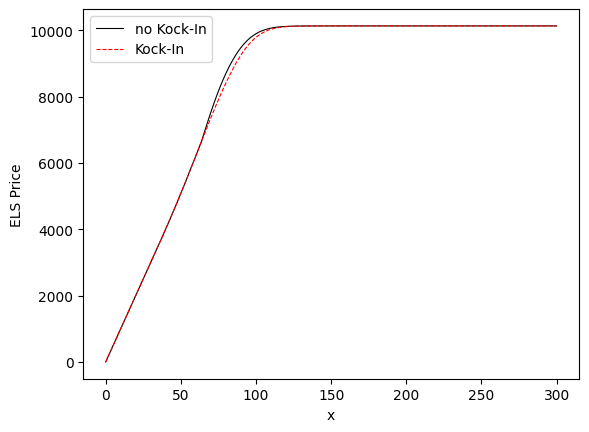

In [ ]:
plt.figure(1)
plt.plot(u[:,Nt-1], 'k', linewidth=0.8, label='no Kock-In')
plt.plot(ku[:,Nt-1], 'r--', linewidth=0.8, label='Kock-In')
plt.xlabel("x", fontsize=10)
plt.ylabel("ELS Price", fontsize=10)
plt.legend()
plt.show()

#### ② 개별주식이 기초자산인 ELS 평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

facevalue=10000; R=300; volatility=0.4217
r=0.0355; Nx=301; h=R/Nx; x0=100
x=np.linspace(0, R, Nx); T=3
Nt=360*T; dt=T/Nt
u=np.zeros((Nx, Nt+1)); ku=np.zeros((Nx, Nt+1))
coupon_rate=np.array([0.3408, 0.2840, 0.2272, 0.1704, 0.1136, 0.0568])
strike_price=np.array([0.75, 0.75, 0.80, 0.80, 0.85, 0.90])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), np.rint(6*Nt/6),Nt+1])
dummy=0.3408; kib=0.40

In [ ]:
for i in range (0,Nx):
    if (x[i]<kib*x0):
        u[i,0]=x[i]/x0*facevalue
        ku[i,0]=x[i]/x0*facevalue
    elif (x[i]<strike_price[0]*x0):
        u[i,0]=facevalue*(1+dummy)
        ku[i,0]=x[i]/x0*facevalue
    else:
        u[i,0]=facevalue*(1+coupon_rate[0])
        ku[i,0]=facevalue*(1+coupon_rate[0])
[a,d,c,b]=map(np.zeros, [Nx, Nx, Nx, Nx])
a[:]=r*x/(2*h)-(volatility*x)**2/(2*h**2)
d[:]=(volatility*x)**2/(h**2)+r+(1/dt)
c[:]=-r*x/(2*h)-(volatility*x)**2/(2*h**2)
a[Nx-1]=a[Nx-1]-c[Nx-1]; d[Nx-1]=d[Nx-1]+2*c[Nx-1]
tag=0

for n in range (0,Nt):
    if (n==step[tag]):
        s=np.min(np.where(x>=x0*strike_price[tag+1]))
        u[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        ku[s:Nx+1,n]=facevalue*(1+coupon_rate[tag+1])
        tag=tag+1
    s=np.min(np.where(x>=x0*kib))
    u[0:s,n]=ku[0:s, n]
    b=u[:,n]/dt
    u[:,n+1]=thomas(a,d,c,b)
    b=ku[:,n]/dt
    ku[:,n+1]=thomas(a,d,c,b)

ii=np.where(x==100)
print('Price=%f'%(u[ii,Nt]))

Price=9669.423079


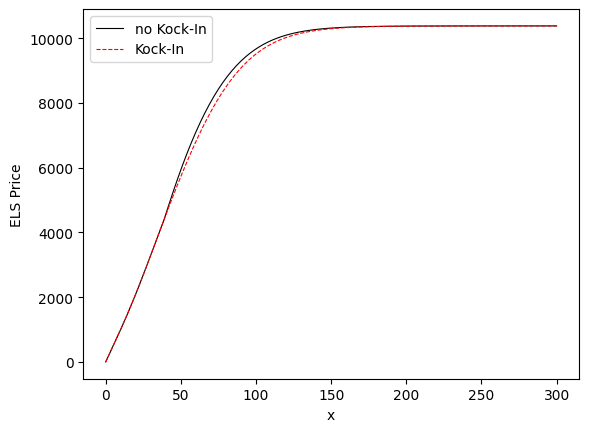

In [ ]:
plt.figure(1)
plt.plot(u[:,Nt-1], 'k', linewidth=0.8, label='no Kock-In')
plt.plot(ku[:,Nt-1], 'r--', linewidth=0.8, label='Kock-In')
plt.xlabel("x", fontsize=10)
plt.ylabel("ELS Price", fontsize=10)
plt.legend()
plt.show()

### 기초자산이 2개인 ELS

#### ① 기초자산이 두 개(지수)인 ELS 평가

In [ ]:
def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

facevalue=10000; R=300;
x_volatility=0.249; y_volatility=0.2182;
rho=0.0489; r=0.0355; Nx=61; Ny=Nx; h=R/Nx;
x0=100; y0=100; x=np.linspace(0, R, Nx); y=x;
T=3; Nt=360*T; dt=T/Nt; lst=[Nx, Ny]
[u, ku, old_u, old_ku]=map(np.zeros, [lst, lst, lst, lst])
coupon_rate=np.array([0.189, 0.1575, 0.126, 0.0945, 0.063, 0.0315])
strike_price=np.array([0.75, 0.80, 0.85, 0.85, 0.90, 0.90])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), np.rint(6*Nt/6),Nt+1])
dummy=0.189; kib=0.50

In [ ]:
for i in range (0,Nx):
    for j in range(0, Ny):
        if (x[i]<kib*x0 or y[j]<kib*y0):
            u[i,j]=np.minimum(x[i], y[j])/x0*facevalue
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        elif (x[i]<=strike_price[0]*x0 or y[j]<=strike_price[0]*x0):
            u[i,j]=facevalue*(1+dummy)
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        else:
            u[i,j]=facevalue*(1+coupon_rate[0])
            ku[i,j]=facevalue*(1+coupon_rate[0])
[ax,dx,cx,ay,dy,cy]=map(np.zeros, [Nx-2, Nx-2, Nx-2, Ny-2, Ny-2, Ny-2])
ax[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2+0.5*r*x[1:Nx-1]/h
dx[:]=1/dt+(x_volatility*x[1:Nx-1]/h)**2+r*0.5
cx[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2-0.5*r*x[1:Nx-1]/h
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]

ay[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2+0.5*r*y[1:Ny-1]/h
dy[:]=1/dt+(y_volatility*y[1:Ny-1]/h)**2+r*0.5
cy[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2-0.5*r*y[1:Ny-1]/h
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3];
tag=0
bx=np.zeros(Nx-2); by=np.zeros(Nx-2);

for n in range (0,Nt):
    if (n==step[tag]):
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        u[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        tag+=1
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    u[:,0:gy+1]=ku[:,0:gy+1]
    u[0:gx+1,:]=ku[0:gx+1,:]
    old_u=u; old_ku=ku;
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_u[2:Nx,j+1]-old_u[2:Nx,j-1]-old_u[0:Nx-2,j+1]+old_u[0:Nx-2,j-1])/(4*h**2)
        u[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    u[Nx-1,1:Ny-1]=2*u[Nx-2,1:Ny-1]-u[Nx-3,1:Ny-1]
    u[:,Ny-1]=2*u[:,Ny-2]-u[:,Ny-3]
    old_u=u;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_u[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_u[i+1,2:Ny]-old_u[i+1,0:Ny-2]-old_u[i-1,2:Ny]+old_u[i-1,0:Ny-2])/(4*h**2)
        u[i,1:Ny-1]=thomas(ay,dy,cy,by)
    u[1:Nx-1,Ny-1]=2*u[1:Nx-1,Ny-2]-u[1:Nx-1,Ny-3]
    u[Nx-1,:]=2*u[Nx-2,:]-u[Nx-3,:]
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_ku[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_ku[2:Nx,j+1]-old_ku[2:Nx,j-1]-old_ku[0:Nx-2,j+1]+old_ku[0:Nx-2,j-1])/(4*h**2)
        ku[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    ku[Nx-1,1:Ny-1]=2*ku[Nx-2,1:Ny-1]-ku[Nx-3,1:Ny-1]
    ku[:,Ny-1]=2*ku[:,Ny-2]-ku[:,Ny-3]
    old_ku=ku;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_ku[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_ku[i+1,2:Ny]-old_ku[i+1,0:Ny-2]-old_ku[i-1,2:Ny]+old_ku[i-1,0:Ny-2])/(4*h**2)
        ku[i,1:Ny-1]=thomas(ay,dy,cy,by)
    ku[1:Nx-1,Ny-1]=2*ku[1:Nx-1,Ny-2]-ku[1:Nx-1,Ny-3]
    ku[Nx-1,:]=2*ku[Nx-2,:]-ku[Nx-3,:]

ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f'%(u[ii,jj]))

Price=9740.194849


Text(0.5, 0, 'ELS Price')

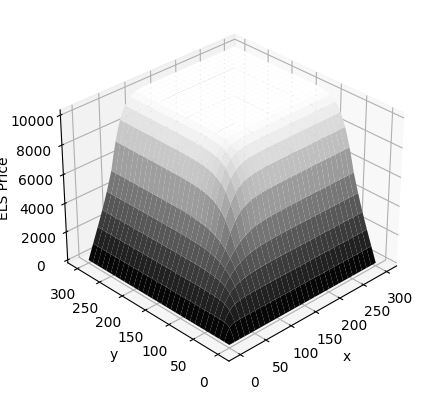

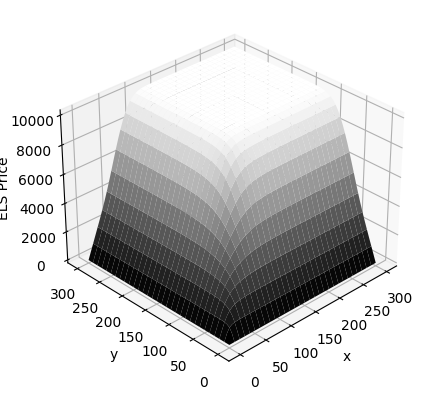

In [ ]:
from matplotlib.figure import projections
X, Y = np.meshgrid(x,y)
fig1=plt.figure()
ax=fig1.add_subplot(projection='3d')
ax.plot_surface(X,Y,u,cmap=plt.cm.gray)
ax.view_init(elev=31,azim=-134)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('ELS Price',rotation=90,fontsize=10)

fig2=plt.figure()
bx=fig2.add_subplot(projection='3d')
bx.plot_surface(X,Y,ku,cmap=plt.cm.gray)
bx.view_init(elev=31,azim=-134)
bx.set_xlabel('x', fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('ELS Price',rotation=90,fontsize=10)

#### ② 기초자산이 두 개(개별종목)인 ELS 평가

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

facevalue=10000; R=300;
x_volatility=0.4217; y_volatility=0.3509;
rho=0.29555; r=0.0355; Nx=61; Ny=Nx; h=R/Nx;
x0=100; y0=100; x=np.linspace(0, R, Nx); y=x;
T=3; Nt=360*T; dt=T/Nt; lst=[Nx, Ny]
[u, ku, old_u, old_ku]=map(np.zeros, [lst, lst, lst, lst])
coupon_rate=np.array([0.42, 0.35, 0.28, 0.21, 0.14, 0.07])
strike_price=np.array([0.75, 0.75, 0.80, 0.85, 0.85, 0.85])
step=np.array([np.rint(Nt/6), np.rint(2*Nt/6), np.rint(3*Nt/6), np.rint(4*Nt/6), np.rint(5*Nt/6), np.rint(6*Nt/6),Nt+1])
dummy=0.42; kib=0.40

In [ ]:
for i in range (0,Nx):
    for j in range(0, Ny):
        if (x[i]<kib*x0 or y[j]<kib*y0):
            u[i,j]=np.minimum(x[i], y[j])/x0*facevalue
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        elif (x[i]<=strike_price[0]*x0 or y[j]<=strike_price[0]*x0):
            u[i,j]=facevalue*(1+dummy)
            ku[i,j]=np.minimum(x[i], y[j])/x0*facevalue
        else:
            u[i,j]=facevalue*(1+coupon_rate[0])
            ku[i,j]=facevalue*(1+coupon_rate[0])
[ax,dx,cx,ay,dy,cy]=map(np.zeros, [Nx-2, Nx-2, Nx-2, Ny-2, Ny-2, Ny-2])
ax[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2+0.5*r*x[1:Nx-1]/h
dx[:]=1/dt+(x_volatility*x[1:Nx-1]/h)**2+r*0.5
cx[:]=-0.5*(x_volatility*x[1:Nx-1]/h)**2-0.5*r*x[1:Nx-1]/h
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]

ay[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2+0.5*r*y[1:Ny-1]/h
dy[:]=1/dt+(y_volatility*y[1:Ny-1]/h)**2+r*0.5
cy[:]=-0.5*(y_volatility*y[1:Ny-1]/h)**2-0.5*r*y[1:Ny-1]/h
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3];
tag=0
bx=np.zeros(Nx-2); by=np.zeros(Nx-2);

for n in range (0,Nt):
    if (n==step[tag]):
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        u[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx-1,gy:Ny-1]=facevalue*(1+coupon_rate[tag+1])
        tag+=1
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    u[:,0:gy+1]=ku[:,0:gy+1]
    u[0:gx+1,:]=ku[0:gx+1,:]
    old_u=u; old_ku=ku;
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_u[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_u[2:Nx,j+1]-old_u[2:Nx,j-1]-old_u[0:Nx-2,j+1]+old_u[0:Nx-2,j-1])/(4*h**2)
        u[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    u[Nx-1,1:Ny-1]=2*u[Nx-2,1:Ny-1]-u[Nx-3,1:Ny-1]
    u[:,Ny-1]=2*u[:,Ny-2]-u[:,Ny-3]
    old_u=u;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_u[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_u[i+1,2:Ny]-old_u[i+1,0:Ny-2]-old_u[i-1,2:Ny]+old_u[i-1,0:Ny-2])/(4*h**2)
        u[i,1:Ny-1]=thomas(ay,dy,cy,by)
    u[1:Nx-1,Ny-1]=2*u[1:Nx-1,Ny-2]-u[1:Nx-1,Ny-3]
    u[Nx-1,:]=2*u[Nx-2,:]-u[Nx-3,:]
    for j in range(1,Ny-1):
        bx[0:Nx-1]=old_ku[1:Nx-1,j]/dt+0.5*rho*x_volatility*y_volatility*x[1:Nx-1]*y[j]*(old_ku[2:Nx,j+1]-old_ku[2:Nx,j-1]-old_ku[0:Nx-2,j+1]+old_ku[0:Nx-2,j-1])/(4*h**2)
        ku[1:Nx-1, j]=thomas(ax,dx,cx,bx)
    ku[Nx-1,1:Ny-1]=2*ku[Nx-2,1:Ny-1]-ku[Nx-3,1:Ny-1]
    ku[:,Ny-1]=2*ku[:,Ny-2]-ku[:,Ny-3]
    old_ku=ku;
    for i in range(1,Nx-1):
        by[0:Ny-1]=old_ku[i,1:Ny-1]/dt+0.5*rho*x_volatility*y_volatility*x[i]*y[1:Ny-1]*(old_ku[i+1,2:Ny]-old_ku[i+1,0:Ny-2]-old_ku[i-1,2:Ny]+old_ku[i-1,0:Ny-2])/(4*h**2)
        ku[i,1:Ny-1]=thomas(ay,dy,cy,by)
    ku[1:Nx-1,Ny-1]=2*ku[1:Nx-1,Ny-2]-ku[1:Nx-1,Ny-3]
    ku[Nx-1,:]=2*ku[Nx-2,:]-ku[Nx-3,:]

ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f'%(u[ii,jj]))

Price=9394.114587


Text(0.5, 0, 'ELS Price')

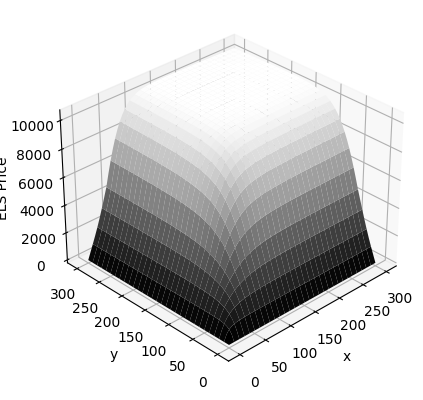

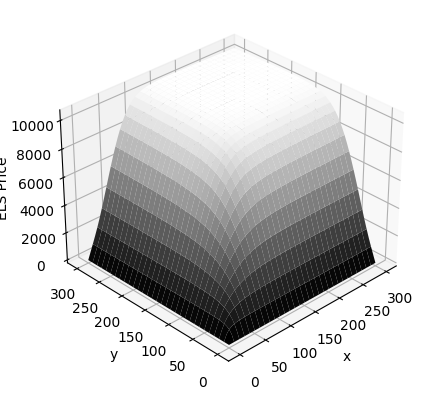

In [ ]:
from matplotlib.figure import projections
X, Y = np.meshgrid(x,y)
fig1=plt.figure()
ax=fig1.add_subplot(projection='3d')
ax.plot_surface(X,Y,u,cmap=plt.cm.gray)
ax.view_init(elev=31,azim=-134)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('ELS Price',rotation=90,fontsize=10)

fig2=plt.figure()
bx=fig2.add_subplot(projection='3d')
bx.plot_surface(X,Y,ku,cmap=plt.cm.gray)
bx.view_init(elev=31,azim=-134)
bx.set_xlabel('x', fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('ELS Price',rotation=90,fontsize=10)

### 기초자산이 3개인 ELS 가격 계산

In [ ]:
def thomas(alpha, beta, gamma, f):
    n=len(f)
    v=np.zeros(n)
    [aa, dd, cc, bb]=map(np.array,[alpha, beta, gamma, f])
    for i in range(1, n):
        mult=aa[i]/dd[i-1]
        dd[i]=dd[i]-mult*cc[i-1]
        bb[i]=bb[i]-mult*bb[i-1]
    v[n-1]=bb[n-1]/dd[n-1]
    for i in range(n-2, -1, -1):
        v[i]=(bb[i]-cc[i]*v[i+1])/dd[i]
    return v

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

facevalue=10000;
x_volatility=0.2497; y_volatility=0.2738; z_volatility=0.2322 # 각각의 변동성
rho_xy=0.52; rho_yz=0.489; rho_zx=0.411; # 상관계수
r=0.0355;  # 무위험 이자율
T=3; # 만기
x0=100; y0=100; z0=100;  # 최초 기준가격
# 조기상환시 쿠폰 이자율
coupon_rate=np.array([0.21, 0.175, 0.14, 0.1105, 0.07, 0.035])
# 조기행사가
strike_price=np.array([0.75, 0.80, 0.85, 0.85, 0.90, 0.90])
dummy=0.21; kib=0.40; # 더미 이자율, 낙인 배리어

In [5]:
Nt=360*T; dt=T/Nt; # 시간격자 갯수, 시간격자 간격
# 비균일하게 격자를 쪼갠 기초자산 1, 2, 3
# R=300; Nx=61; Ny=Nx; Nz=Nx;
# x=np.linspace(0, R, Nx); y=x; z=x;

A=np.array([0]); B=np.arange(65,132.5,2.5); C=np.array([160,180,200,220]);
x=np.r_[A,B,C]; y=x; z=x;
# x, y, z벡터의 크기
Nx=len(x); Ny=Nx; Nz=Nx;
hx=np.diff(x); hy=hx; hz=hx;
step=np.arange(1,8,1)*Nt/6
lst=[Nx,Ny,Nz]
[u,ku]=map(np.zeros,[lst,lst])
# 유한차분법으로 ELS 가격을 구하기 위한 초기값
for i in range(0,Nx):
    for j in range(0,Ny):
        for k in range(0,Nz):
            if (x[i]<=kib*x0 or y[j]<=kib*y0 or z[k]<=kib*z0):
                u[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            elif (x[i]<strike_price[0]*x0 or y[j]<strike_price[0]*y0 or z[k]<strike_price[0]*z0):
                u[i,j,k]=facevalue*(1.0+dummy)
                ku[i,j,k]=np.min([x[i],y[j],z[k]])/x0*facevalue
            else:
                u[i,j,k]=facevalue*(1+coupon_rate[0])
                ku[i,j,k]=facevalue*(1+coupon_rate[0])
# 유한차분법을 사용하기 위한 계수
[ax,dx,cx,ay,dy,cy,az,dz,cz]=map(np.zeros,[Nx-2,Nx-2,Nx-2,Ny-2,Ny-2,Ny-2,Nz-2,Nz-2,Nz-2])
ax[:]=(-(x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[1:Nx-1])/(hx[0:Nx-2]*(hx[0:Nx-2]+hx[1:Nx-1]))
dx[:]=1/dt+(x_volatility*x[1:Nx-1])**2/(hx[0:Nx-2]*hx[1:Nx-1])-r*x[1:Nx-1]*(hx[1:Nx-1]-hx[0:Nx-2])/(hx[0:Nx-2]*hx[1:Nx-1])+r/3
cx[:]=-((x_volatility*x[1:Nx-1])**2+r*x[1:Nx-1]*hx[0:Nx-2])/(hx[1:Nx-1]*(hx[0:Nx-2]+hx[1:Nx-1]))
# 선형 경계조건
ax[Nx-3]=ax[Nx-3]-cx[Nx-3]
dx[Nx-3]=dx[Nx-3]+2*cx[Nx-3]
ay[:]=(-(y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[1:Ny-1])/(hy[0:Ny-2]*(hy[0:Ny-2]+hy[1:Ny-1]))
dy[:]=1/dt+(y_volatility*y[1:Ny-1])**2/(hy[0:Ny-2]*hy[1:Ny-1])-r*y[1:Ny-1]*(hy[1:Ny-1]-hy[0:Ny-2])/(hy[0:Ny-2]*hy[1:Ny-1])+r/3
cy[:]=-((y_volatility*y[1:Ny-1])**2+r*y[1:Ny-1]*hy[0:Ny-2])/(hy[1:Ny-1]*(hy[0:Ny-2]+hy[1:Ny-1]))
ay[Ny-3]=ay[Ny-3]-cy[Ny-3]
dy[Ny-3]=dy[Ny-3]+2*cy[Ny-3]
az[:]=(-(z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[1:Nz-1])/(hz[0:Nz-2]*(hz[0:Nz-2]+hz[1:Nz-1]))
dz[:]=1/dt+(z_volatility*z[1:Nz-1])**2/(hz[0:Nz-2]*hz[1:Nz-1])-r*z[1:Nz-1]*(hz[1:Nz-1]-hz[0:Nz-2])/(hz[0:Nz-2]*hz[1:Nz-1])+r/3
cz[:]=-((z_volatility*z[1:Nz-1])**2+r*z[1:Nz-1]*hz[0:Nz-2])/(hz[1:Nz-1]*(hz[0:Nz-2]+hz[1:Nz-1]))
az[Nz-3]=az[Nz-3]-cz[Nz-3]
dz[Nz-3]=dz[Nz-3]+2*cz[Nz-3]
# OS방법을 사용하기 위해 u, ku와 같은 초기의 행렬 생성
[old_u,old_ku]=map(np.zeros,[lst,lst])
[fx,fy,fz]=map(np.zeros,[Nx-2,Nx-2,Nx-2])
tag=0

for iter in range(0,Nt):
    # 조기상환일의 페이오프
    if iter==step[tag]:
        gx=np.min(np.where(x>=x0*strike_price[tag+1]))
        gy=np.min(np.where(y>=y0*strike_price[tag+1]))
        gz=np.min(np.where(z>=z0*strike_price[tag+1]))
        u[gx:Nx,gy:Ny,gz:Nz]=facevalue*(1+coupon_rate[tag+1])
        ku[gx:Nx,gy:Ny,gz:Nz]=facevalue*(1+coupon_rate[tag+1])
        tag += 1
    gx=np.min(np.where(x>=x0*kib))
    gy=np.min(np.where(y>=y0*kib))
    gz=np.min(np.where(z>=z0*kib))
    u[0:gx+1,:,:]=ku[0:gx+1,:,:];
    u[:,0:gy+1,:]=ku[:,0:gy+1,:];
    u[:,:,0:gz+1]=ku[:,:,0:gz+1]
    # OSM과 토마스 알고리즘을 이용하여 u값 계산
    # x축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[1:Nx-1]*y[j]\
              *(u[2:Nx,j+1,k]-u[2:Nx,j-1,k]\
              -u[0:Nx-2,j+1,k]+u[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]\
              *hy[j]+hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]\
              *hy[j-1])+1/3*rho_zx*x_volatility\
              *z_volatility*x[1:Nx-1]*z[k]\
              *(u[2:Nx,j,k+1]-u[2:Nx,j,k-1]\
              -u[0:Nx-2,j,k+1]+u[0:Nx-2,j,k-1])\
              /(hx[0:Nx-2]*hz[k]+hx[1:Nx-1]*hz[k]\
              +hx[1:Nx-1]*hz[k-1]+hx[0:Nx-2]*hz[k-1])\
              +1/3*rho_yz*y_volatility*z_volatility\
              *y[j]*z[k]*(u[1:Nx-1,j+1,k+1]\
              -u[1:Nx-1,j+1,k-1]-u[1:Nx-1,j-1,k+1]\
              +u[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
              +hy[j]*hz[k]+hy[j]*hz[k-1])+hy[j-1]\
              *hz[k-1]+u[1:Nx-1,j,k]/dt
            old_u[1:Nx-1,j,k]=thomas(ax,dx,cx,fx)
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]
    # y축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
            fy[0:Ny-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[1:Ny-1]\
              *(old_u[i+1,2:Ny,k]-old_u[i+1\
              ,0:Ny-2,k]-old_u[i-1,2:Ny,k]\
              +old_u[i-1,0:Ny-2,k])/(hx[i-1]\
              *hy[1:Ny-1]+hx[i]*hy[1:Ny-1]\
              +hx[i]*hy[0:Ny-2]+hx[i-1]\
              *hy[0:Ny-2])+1/3*rho_zx\
              *x_volatility*z_volatility\
              *x[i]*z[k]*(old_u[i+1,1:Ny-1,k+1]\
              -old_u[i+1,1:Ny-1,k-1]-old_u[i-1\
              ,1:Ny-1,k+1]+old_u[i-1,1:Ny-1,k-1])\
              /(hx[i-1]*hz[k]+hx[i]*hz[k]\
              +hx[i]*hz[k-1]+hx[i-1]*hz[k-1])\
              +1/3*rho_yz*y_volatility\
              *z_volatility*y[1:Ny-1]*z[k]\
              *(old_u[i,2:Ny,k+1]-old_u[i,2:Ny,k-1]\
              -old_u[i,0:Ny-2,k+1]+old_u[i,0:Ny-2\
              ,k-1])/(hy[0:Ny-2]*hz[k]+hy[1:Ny-1]\
              *hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
              *hz[k-1])+old_u[i,1:Ny-1,k]/dt
            u[i,1:Ny-1,k]=thomas(ay,dy,cy,fy)
    u[1:Nx-1,1:Ny-1,Nz-1]=2*u[1:Nx-1,1:Ny-1,Nz-2]-u[1:Nx-1,1:Ny-1,Nz-3]
    u[Nx-1,1:Ny-1,1:Nz]=2*u[Nx-2,1:Ny-1,1:Nz]-u[Nx-3,1:Ny-1,1:Nz]
    u[1:Nx,Ny-1,1:Nz]=2*u[1:Nx,Ny-2,1:Nz]-u[1:Nx,Ny-3,1:Nz]
    # z 축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[j]\
              *(u[i+1,j+1,1:Nz-1]-u[i+1,j-1,1:Nz-1]\
              -u[i-1,j+1,1:Nz-1]+u[i-1,j-1,1:Nz-1])\
              /(hx[i-1]*hy[j]+hx[i]*hy[j]+hx[i]\
              *hy[j-1]+hx[i-1]*hy[j-1])+1/3*rho_zx\
              *x_volatility*z_volatility*x[i]\
              *z[1:Nz-1]*(u[i+1,j,2:Nz]\
              -u[i+1,j,0:Nz-2]-u[i-1,j,2:Nz]\
              +u[i-1,j,0:Nz-2])/(hx[i-1]*hz[1:Nz-1]\
              +hx[i]*hz[1:Nz-1]+hx[i]*hz[0:Nz-2]\
              +hx[i-1]*hz[0:Nz-2])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]\
              *z[1:Nz-1]*(u[i,j+1,2:Nz]\
              -u[i,j+1,0:Nz-2]-u[i,j-1,2:Nz]\
              +u[i,j-1,0:Nz-2])/(hy[j-1]\
              *hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
              +hy[j]*hz[0:Nz-2]+hy[j-1]*hz[0:Nz-2])\
              +u[i,j,1:Nz-1]/dt
            old_u[i,j,1:Nz-1]=thomas(az,dz,cz,fz)
    old_u[1:Nx-1,1:Ny-1,Nz-1]=2*old_u[1:Nx-1,1:Ny-1,Nz-2]-old_u[1:Nx-1,1:Ny-1,Nz-3]
    old_u[Nx-1,1:Ny-1,1:Nz]=2*old_u[Nx-2,1:Ny-1,1:Nz]-old_u[Nx-3,1:Ny-1,1:Nz]
    old_u[1:Nx,Ny-1,1:Nz]=2*old_u[1:Nx,Ny-2,1:Nz]-old_u[1:Nx,Ny-3,1:Nz]
    u=old_u

    # OSM과 토마스 알고리즘을 이용하여 ku값 계산
    # x 축으로 풀기
    for j in range(1,Ny-1):
        for k in range(1,Nz-1):
            fx[0:Nx-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[1:Nx-1]*y[j]\
              *(ku[2:Nx,j+1,k]-ku[2:Nx,j-1,k]\
              -ku[0:Nx-2,j+1,k]+ku[0:Nx-2,j-1,k])\
              /(hx[0:Nx-2]*hy[j]+hx[1:Nx-1]*hy[j]\
              +hx[1:Nx-1]*hy[j-1]+hx[0:Nx-2]*hy[j-1])\
              +1/3*rho_zx*x_volatility*z_volatility\
              *x[1:Nx-1]*z[k]*(ku[2:Nx,j,k+1]\
              -ku[2:Nx,j,k-1]-ku[0:Nx-2,j,k+1]\
              +ku[0:Nx-2,j,k-1])/(hx[0:Nx-2]*hz[k]\
              +hx[1:Nx-1]*hz[k]+hx[1:Nx-1]*hz[k-1]\
              +hx[0:Nx-2]*hz[k-1])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]\
              *z[k]*(ku[1:Nx-1,j+1,k+1]\
              -ku[1:Nx-1,j+1,k-1]-ku[1:Nx-1,j-1,k+1]\
              +ku[1:Nx-1,j-1,k-1])/(hy[j-1]*hz[k]\
              +hy[j]*hz[k]+hy[j]*hz[k-1]+hy[j-1]\
              *hz[k-1])+ku[1:Nx-1,j,k]/dt
            old_ku[1:Nx-1,j,k]=thomas(ax,dx,cx,fx)
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]
    # y 축으로 풀기
    for k in range(1,Nz-1):
        for i in range(1,Nx-1):
             fy[0:Ny-1]=1/3*rho_xy*x_volatility\
              *y_volatility*x[i]*y[1:Ny-1]\
              *(old_ku[i+1,2:Ny,k]-old_ku[i+1,0:Ny-2,\
              k]-old_ku[i-1,2:Ny,k]+old_ku[i-1,0:Ny-2,k])\
              /(hx[i-1]*hy[1:Ny-1]+hx[i]*hy[1:Ny-1]\
              +hx[i]*hy[0:Ny-2]+hx[i-1]*hy[0:Ny-2])\
              +1/3*rho_zx*x_volatility*z_volatility\
              *x[i]*z[k]*(old_ku[i+1,1:Ny-1,k+1]\
              -old_ku[i+1,1:Ny-1,k-1]-old_ku[i-1,\
              1:Ny-1,k+1]+old_ku[i-1,1:Ny-1,k-1])/\
              (hx[i-1]*hz[k]+hx[i]*hz[k]+hx[i]\
              *hz[k-1]+hx[i-1]*hz[k-1])+1/3*rho_yz*\
              y_volatility*z_volatility*y[1:Ny-1]\
              *z[k]*(old_ku[i,2:Ny,k+1]-old_ku[i,2:Ny\
              ,k-1]-old_ku[i,0:Ny-2,k+1]\
              +old_ku[i,0:Ny-2,k-1])/(hy[0:Ny-2]*hz[k]\
              +hy[1:Ny-1]*hz[k]+hy[1:Ny-1]*hz[k-1]+hy[0:Ny-2]\
              *hz[k-1])+old_ku[i,1:Ny-1,k]/dt
             ku[i,1:Ny-1,k]=thomas(ay,dy,cy,fy)
    ku[1:Nx-1,1:Ny-1,Nz-1]=2*ku[1:Nx-1,1:Ny-1,Nz-2]-ku[1:Nx-1,1:Ny-1,Nz-3]
    ku[Nx-1,1:Ny-1,1:Nz]=2*ku[Nx-2,1:Ny-1,1:Nz]-ku[Nx-3,1:Ny-1,1:Nz]
    ku[1:Nx,Ny-1,1:Nz]=2*ku[1:Nx,Ny-2,1:Nz]-ku[1:Nx,Ny-3,1:Nz]
    # z 축으로 풀기
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            fz[0:Nz-1]=1/3*rho_xy*x_volatility*y_volatility\
              *x[i]*y[j]*(ku[i+1,j+1,1:Nz-1]\
              -ku[i+1,j-1,1:Nz-1]-ku[i-1,j+1,1:Nz-1]\
              +ku[i-1,j-1,1:Nz-1])/(hx[i-1]\
              *hy[j]+hx[i]*hy[j]+hx[i]*hy[j-1]\
              +hx[i-1]*hy[j-1])+1/3*rho_zx\
              *x_volatility*z_volatility*x[i]\
              *z[1:Nz-1]*(ku[i+1,j,2:Nz]\
              -ku[i+1,j,0:Nz-2]-ku[i-1,j,2:Nz]\
              +ku[i-1,j,0:Nz-2])/(hx[i-1]\
              *hz[1:Nz-1]+hx[i]*hz[1:Nz-1]\
              +hx[i]*hz[0:Nz-2]+hx[i-1]*hz[0:Nz-2])+1/3*rho_yz\
              *y_volatility*z_volatility*y[j]\
              *z[1:Nz-1]*(ku[i,j+1,2:Nz]\
              -ku[i,j+1,0:Nz-2]-ku[i,j-1,2:Nz]\
              +ku[i,j-1,0:Nz-2])/(hy[j-1]\
              *hz[1:Nz-1]+hy[j]*hz[1:Nz-1]\
              +hy[j]*hz[0:Nz-2]+hy[j-1]\
              *hz[0:Nz-2])+ku[i,j,1:Nz-1]/dt
            old_ku[i,j,1:Nz-1]=thomas(az,dz,cz,fz)
    old_ku[1:Nx-1,1:Ny-1,Nz-1]=2*old_ku[1:Nx-1,1:Ny-1,Nz-2]-old_ku[1:Nx-1,1:Ny-1,Nz-3]
    old_ku[Nx-1,1:Ny-1,1:Nz]=2*old_ku[Nx-2,1:Ny-1,1:Nz]-old_ku[Nx-3,1:Ny-1,1:Nz]
    old_ku[1:Nx,Ny-1,1:Nz]=2*old_ku[1:Nx,Ny-2,1:Nz]-old_ku[1:Nx,Ny-3,1:Nz]
    ku=old_ku

kk=np.argwhere(z==100)
ii=np.where(x==100)
jj=np.where(y==100)
print('Price=%f'%(u[ii,jj,kk]))

Price=9143.098547


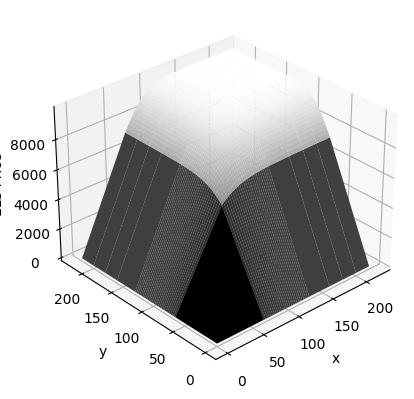

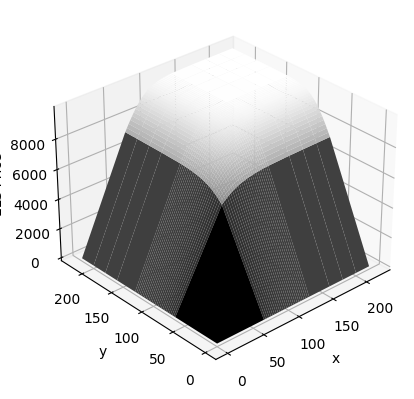

In [6]:
from matplotlib.figure import projections
X, Y = np.meshgrid(x,y)
kk=np.argwhere(z==100)

fig1=plt.figure()
ax=fig1.add_subplot(projection='3d')
ax.plot_surface(X,Y,u[:,:,int(kk)],cmap=plt.cm.gray)
ax.view_init(elev=30,azim=-132)
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('ELS Price',rotation=90,fontsize=10)

fig2=plt.figure()
bx=fig2.add_subplot(projection='3d')
bx.plot_surface(X,Y,ku[:,:,int(kk)],cmap=plt.cm.gray)
bx.view_init(elev=30,azim=-132)
bx.set_xlabel('x', fontsize=10)
bx.set_ylabel('y', fontsize=10)
bx.zaxis.set_rotate_label(False)
bx.set_zlabel('ELS Price',rotation=90,fontsize=10)
plt.show()